In [51]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

In [3]:
train_set = pd.read_csv('Training.csv')
test_set = pd.read_csv('Testing.csv')

In [4]:
train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
len(train_set)

4920

In [6]:
len(test_set)

42

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
train_set.prognosis.value_counts()

Hepatitis C                                120
Hepatitis D                                120
Peptic ulcer diseae                        120
Dengue                                     120
Hepatitis E                                120
Diabetes                                   120
hepatitis A                                120
Gastroenteritis                            120
Impetigo                                   120
Allergy                                    120
Arthritis                                  120
Varicose veins                             120
AIDS                                       120
Dimorphic hemmorhoids(piles)               120
(vertigo) Paroymsal  Positional Vertigo    120
Urinary tract infection                    120
Fungal infection                           120
GERD                                       120
Hypothyroidism                             120
Drug Reaction                              120
Hyperthyroidism                            120
Bronchial Ast

In [9]:
test_set.prognosis.value_counts()

Fungal infection                           2
Varicose veins                             1
Gastroenteritis                            1
Chicken pox                                1
Pneumonia                                  1
Arthritis                                  1
Chronic cholestasis                        1
Allergy                                    1
Bronchial Asthma                           1
Psoriasis                                  1
Paralysis (brain hemorrhage)               1
Tuberculosis                               1
AIDS                                       1
Acne                                       1
Hyperthyroidism                            1
Common Cold                                1
Dimorphic hemmorhoids(piles)               1
Malaria                                    1
(vertigo) Paroymsal  Positional Vertigo    1
Jaundice                                   1
Osteoarthristis                            1
Diabetes                                   1
Hepatitis 

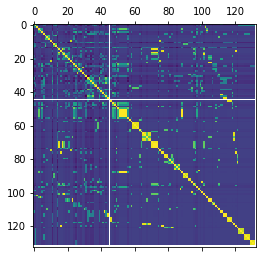

In [10]:
plt.matshow(train_set.corr())
plt.show()

In [16]:
symptoms = list(train_set.columns)
diseases = list(train_set.prognosis.unique())

In [17]:
diseases 

['Fungal infection',
 'Allergy',
 'GERD',
 'Chronic cholestasis',
 'Drug Reaction',
 'Peptic ulcer diseae',
 'AIDS',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Cervical spondylosis',
 'Paralysis (brain hemorrhage)',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'hepatitis A',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Alcoholic hepatitis',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Dimorphic hemmorhoids(piles)',
 'Heart attack',
 'Varicose veins',
 'Hypothyroidism',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Osteoarthristis',
 'Arthritis',
 '(vertigo) Paroymsal  Positional Vertigo',
 'Acne',
 'Urinary tract infection',
 'Psoriasis',
 'Impetigo']

In [18]:
filtered_diseases = ['Allergy',
 'Chronic cholestasis',
 'Diabetes ',
 'Gastroenteritis',
 'Bronchial Asthma',
 'Hypertension ',
 'Migraine',
 'Jaundice',
 'Malaria',
 'Chicken pox',
 'Dengue',
 'Typhoid',
 'Tuberculosis',
 'Common Cold',
 'Pneumonia',
 'Heart attack',
 'Hypoglycemia',
 'Urinary tract infection',
 'Psoriasis']

In [28]:
train_sett = train_set[train_set['prognosis'].isin(filtered_diseases)]

In [24]:
filtered_symptoms = ['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'swelling_of_stomach',
 'blurred_and_distorted_vision',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs',
 'fast_heart_rate',
 'neck_pain',
 'dizziness',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'excessive_hunger',
 'drying_and_tingling_lips',
 'knee_pain',
 'hip_joint_pain',
 'muscle_weakness',
 'stiff_neck',
 'spinning_movements',
 'loss_of_balance',
 'unsteadiness',
 'loss_of_smell',
 'bladder_discomfort',
 'internal_itching',
 'depression',
 'muscle_pain',
 'red_spots_over_body',
 'belly_pain',
 'abnormal_menstruation',
 'watering_from_eyes',
 'increased_appetite',
 'lack_of_concentration',
 'visual_disturbances',
 'history_of_alcohol_consumption',
 'blood_in_sputum',
 'painful_walking',
 'red_sore_around_nose',
 'prognosis']

In [29]:
train_sett = train_sett[filtered_symptoms]
train_sett

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,abnormal_menstruation,watering_from_eyes,increased_appetite,lack_of_concentration,visual_disturbances,history_of_alcohol_consumption,blood_in_sputum,painful_walking,red_sore_around_nose,prognosis
10,0,0,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Allergy
11,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Allergy
12,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Allergy
13,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Allergy
14,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Heart attack
4912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection


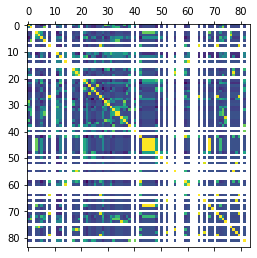

In [31]:
plt.matshow(train_sett.corr())
plt.show()

In [52]:
train_sett.astype(bool).sum(axis=0)

itching                            342
skin_rash                          342
nodal_skin_eruptions                 0
continuous_sneezing                222
shivering                          108
chills                             798
joint_pain                         228
stomach_pain                         0
acidity                            114
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                          1014
fatigue                           1140
weight_gain                          0
anxiety                            114
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                        342
restlessness                       114
lethargy                           228
patches_in_throat                    0
cough                              450
high_fever                        1032
sunken_eyes                        108
breathlessness                     450
sweating                 

In [56]:
train_sett = train_sett.loc[:, (train_sett !=0).any(axis=0)]

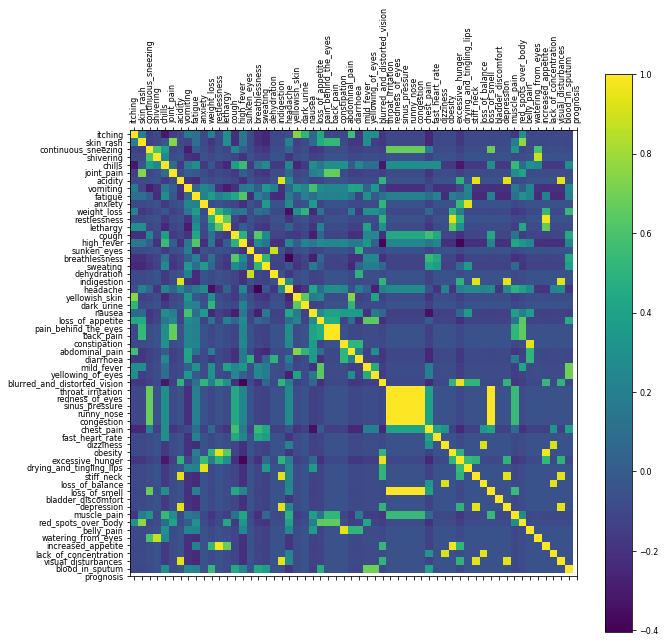

In [75]:
f = plt.figure(figsize=(10, 10))
plt.matshow(train_sett.corr(), fignum=f.number)
plt.xticks(range(train_sett.shape[1]), train_sett.columns, fontsize=8, rotation=90)
plt.yticks(range(train_sett.shape[1]), train_sett.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)

In [67]:
train_label = train_set[['prognosis']].copy()
train_label.head()

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [68]:
train_data = train_set.drop(columns = ['prognosis', 'Unnamed: 133'], axis=1)
train_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [69]:
test_label = test_set[['prognosis']].copy()
test_label.head()

,prognosis
0,Fungal infection
1,Allergy
2,GERD
3,Chronic cholestasis
4,Drug Reaction


In [70]:
test_data = test_set.drop(columns = ['prognosis'], axis=1)
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
BC_SVC = BaggingClassifier(base_estimator=LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=0.8, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1500), n_estimators = 50, random_state = 7, bootstrap=True, bootstrap_features=False) 
BC_SVC.fit(train_data, train_label)

C:\Users\JSSHR\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=LinearSVC(C=0.8, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1500,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=7, verbose=0, warm_start=False)

In [40]:
BC_SVC_predicted = BC_SVC.predict(test_data)
print("Testing accuracy score for the model is:",accuracy_score(test_label, BC_SVC_predicted)*100,'%')

Testing accuracy score for the model is: 100.0 %


In [109]:
train_x, test_x, train_y, test_y = train_test_split(train_data, train_label, stratify = train_label,test_size =0.45 )

In [82]:
BC_SVC = BaggingClassifier(base_estimator=LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=0.8, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1500), n_estimators = 50, random_state = 7, bootstrap=True, bootstrap_features=False) 
BC_SVC.fit(train_x, train_y)

C:\Users\JSSHR\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=LinearSVC(C=0.8, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1500,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=7, verbose=0, warm_start=False)

In [83]:
BC_SVC_predicted = BC_SVC.predict(test_x)
print("Testing accuracy score for the model is:",accuracy_score(test_y, BC_SVC_predicted)*100,'%')

Testing accuracy score for the model is: 100.0 %


In [87]:
train_set[prognosis]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [110]:
clf = LogisticRegressionCV(class_weight='balanced', multi_class='multinomial', solver='lbfgs')
clf.fit(train_x, train_y)


C:\Users\JSSHR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [111]:
# BC_SVC_predicted = BC_SVC.predict(test_x)
pred = clf.predict(test_x)
print("Testing accuracy score for the model is:",accuracy_score(test_y, pred)*100,'%')


Testing accuracy score for the model is: 100.0 %
